In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

Reading sequentional data showing pageviews on MSNBC site

In [19]:
data = pd.read_csv("msnbc990928.seq", header=None, names = ['c'])
data = data[3:]

In [20]:
data.head()

,c
3,1 1
4,2
5,3 2 2 4 2 2 2 3 3
6,5
7,1


Using CountVectorizer to split views into columns in Data Frame

In [217]:
vectorizer = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
vectorizer.fit(data.c)
x = vectorizer.transform(data.c)

In [218]:
counter=x.todense()

In [219]:
counters=pd.DataFrame(counter)

In [220]:
counters.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,5,3,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Column names don't correspond with values, column 9 has data about site number 2. Renaming columns with site names. 

In [221]:
counters=counters.rename(columns={0: 'frontpage', 9: 'news', 10:'tech', 11:'local', 12:'opinion', 13:'on-air', 14:'misc', 15:'weather', 16:'msn-news', 1:'health', 2:'living', 3:'business', 4:'msn-sports', 5:'sports', 6:'summary', 7:'bbs', 8:'travel'})

In [222]:
counters.head()

,frontpage,health,living,business,msn-sports,sports,summary,bbs,travel,news,tech,local,opinion,on-air,misc,weather,msn-news
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,5,3,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Checking total site views of users to look for outliers caused probably by bots

In [223]:
counters['total']=counters.sum(axis=1)

In [224]:
counters.head()

,frontpage,health,living,business,msn-sports,sports,summary,bbs,travel,news,tech,local,opinion,on-air,misc,weather,msn-news,total
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,5,3,1,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [225]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

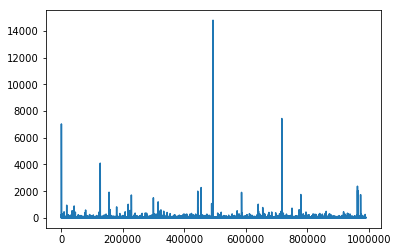

In [226]:
plt.plot(counters['total'])
plt.show()

Deleting rows with total observations over 200

In [227]:
counters = counters[counters.total < 200]

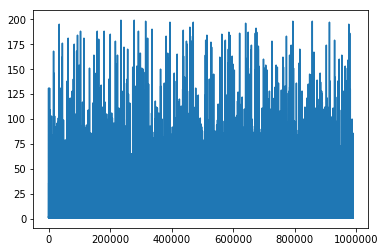

In [228]:
plt.plot(counters['total'])
plt.show()

In [229]:
counters=counters.drop(['total'],axis=1)

Checking best number of clusters with inertia. Choosing 8 as it is the first number after decrease stops.

In [232]:
ks = range(1, 12)
inertias = []
for k in ks:
   
    model = MiniBatchKMeans(n_clusters=k)

    model.fit(counters)
    labels = model.labels_
   
    inertias.append(model.inertia_)   

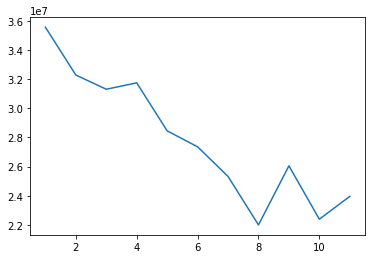

In [233]:
plt.plot(ks,inertias)
plt.show()

In [234]:
model=MiniBatchKMeans(n_clusters=8)

In [235]:
model.fit(counters)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [236]:
labels=model.labels_

In [237]:
counters['label']=labels

In [238]:
counters.head(10)

,frontpage,health,living,business,msn-sports,sports,summary,bbs,travel,news,tech,local,opinion,on-air,misc,weather,msn-news,label
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,5,3,1,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
8,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,4,0,1
9,0,3,0,0,0,0,0,0,0,0,1,6,1,1,0,0,1,4


In [239]:
np.set_printoptions(suppress=True)

Reviewing cluster centers and transforming them to DataFrame for PCA and further analysis

In [240]:
model.cluster_centers_

array([[  0.76271186,   0.40677966,   0.01694915,   0.19491525,
          0.        ,   0.26271186,   0.13559322,   0.10169492,
          0.04237288,   0.22033898,   0.10169492,   0.15254237,
          0.25423729,   4.60169492,   3.        ,   0.08474576,
          0.04237288],
       [  0.11940299,   0.        ,   0.        ,   0.14925373,
          0.10447761,   0.08955224,   0.        ,   0.        ,
          0.        ,   0.17910448,   0.08955224,   0.10447761,
          0.        ,   0.07462687,   0.04477612,   3.50746269,
          0.10447761],
       [  5.25177305,   0.13475177,   0.27304965,   0.58156028,
          0.0106383 ,   0.31205674,   0.03191489,   0.        ,
          0.0248227 ,   0.61347518,   0.30851064,   0.29078014,
          0.12765957,   0.11702128,   0.37234043,   0.03900709,
          0.04609929],
       [  0.1969697 ,   0.21212121,   0.04545455,   0.03030303,
          0.15151515,   0.        ,   0.        ,   0.        ,
          0.        ,   0.25757576,

In [241]:
counters_pca=counters.drop(['label'],axis=1)

In [242]:
counters_pca.head()

,frontpage,health,living,business,msn-sports,sports,summary,bbs,travel,news,tech,local,opinion,on-air,misc,weather,msn-news
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,5,3,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [243]:
from sklearn.decomposition import PCA

In [244]:
centers=model.cluster_centers_

In [245]:
centers=pd.DataFrame(centers)

In [255]:
centers.columns=counters_pca.columns

In [256]:
centers

,frontpage,health,living,business,msn-sports,sports,summary,bbs,travel,news,tech,local,opinion,on-air,misc,weather,msn-news
0,0.762712,0.406780,0.016949,0.194915,0.000000,0.262712,0.135593,0.101695,0.042373,0.220339,0.101695,0.152542,0.254237,4.601695,3.000000,0.084746,0.042373
1,0.119403,0.000000,0.000000,0.149254,0.104478,0.089552,0.000000,0.000000,0.000000,0.179104,0.089552,0.104478,0.000000,0.074627,0.044776,3.507463,0.104478
2,5.251773,0.134752,0.273050,0.581560,0.010638,0.312057,0.031915,0.000000,0.024823,0.613475,0.308511,0.290780,0.127660,0.117021,0.372340,0.039007,0.046099
3,0.196970,0.212121,0.045455,0.030303,0.151515,0.000000,0.000000,0.000000,0.000000,0.257576,0.000000,0.227273,0.106061,0.106061,0.318182,11.090909,0.227273
4,0.304748,0.077519,0.082364,0.213178,0.241279,0.160368,0.048934,0.002422,0.008721,0.294574,0.200097,0.176357,0.094961,0.247578,0.056202,0.114826,0.187500
5,0.869565,0.826087,0.434783,0.217391,0.086957,0.521739,0.043478,0.000000,0.000000,0.956522,0.260870,17.130435,0.086957,1.043478,1.478261,0.130435,0.478261
6,1.777778,0.000000,0.074074,0.259259,1.722222,10.351852,0.000000,0.148148,0.055556,0.351852,0.074074,0.092593,0.000000,0.111111,1.129630,0.129630,0.037037
7,1.538462,0.564103,0.435897,0.974359,0.000000,0.153846,0.000000,0.000000,0.051282,9.743590,0.230769,0.282051,0.102564,0.384615,0.410256,0.487179,0.128205


In [257]:
pca = PCA(n_components=2).fit_transform(centers)
xs=pca[:,0]
ys=pca[:,1]

Plotting the cluster centers in two dimensions with PCA

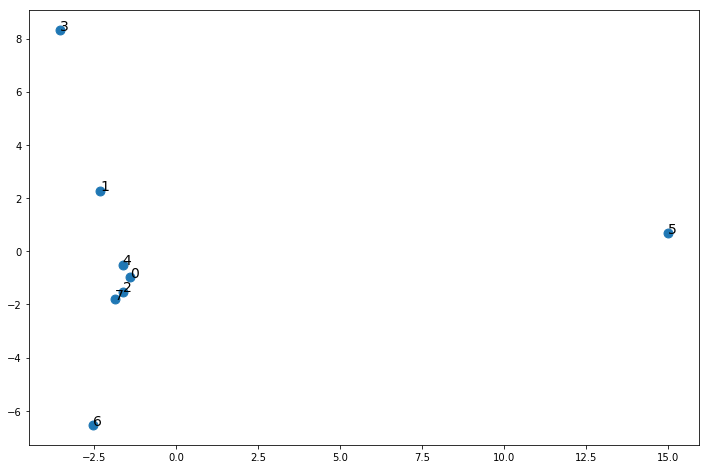

In [258]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(xs,ys,s=80)

for i, txt in enumerate(centers.index):
    ax.annotate(txt, (xs[i],ys[i]), size=14)
    
plt.show()

Marking largest variables in each column (page). This view shows for which cluster specific page is most significant.

Doesn't work on GitHub viewer.

In [262]:
centers.style.highlight_max(axis=0, color='yellow')

Marking largest variables in each cluster center (rows). This view shows which page is most significant for each cluster.

Doesn't work on GitHub viewer.

In [264]:
centers.style.highlight_max(axis=1,color='green')

Summary:
- clusters 3, 5, 6 are significantly far from others on the 2D plot
- cluster 3 differs due to high significance of weather page visits
- cluster 5 differs due to high significance of local page visits
- cluster 6 differs due to high significance of sports page visits
- clusters 0,1,2,4,7 are similar on 2D plot but looking at the details of their centers show that they indeed differ. 0 is focused on on-air, 1 on weather, 2 on frontpage, 4 is pretty flat and 7 focuses on news